In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas.util.testing as tm
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm #support vector Machine
from sklearn.metrics import confusion_matrix #for confusion matrix

C:\Users\Lelia Sari\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


In [71]:
dataset = pd.read_csv('Titanic.csv')

In [72]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
train_df = pd.read_csv('Titanic.csv',index_col=0)
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [77]:
#diketahui Missing value untuk 'Cabin' 687, missing value untuk 'Age' sebanyak 177, dan untuk variable 'Embarked' sebanyak 2 missing value
# Dari sini feature yang akan digunakan untuk klasifikasi Survived dan Non Survived hanya berdasarkan 'Sex', dan 'Age'

In [78]:
#We can see that some feature has to be imputated, and all feature need to be converted as numeric, 
#we also need to exclude features that are not relevant.

# Data Preprocessing

#Exclude 'Cabin' feature because it has 687 missing value data
dataset.drop('Cabin', axis=1, inplace=True)

#Exclude 'Ticket' feature because it has 681 unique data out of 891 data
dataset.drop('Ticket', axis=1, inplace=True)

#complete missing 'Age' values with median
dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

#complete embarked with mode
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

#complete missing fare with median
dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

#Fill Empty 'Embarked' feature and convert to categorical numeric
dataset.Embarked[dataset.Embarked == 'S'] = 1
dataset.Embarked[dataset.Embarked == 'C'] = 2
dataset.Embarked[dataset.Embarked == 'Q'] = 3

#Convert 'Sex' to Numeric type
dataset.Sex[dataset.Sex == 'male'] = 1
dataset.Sex[dataset.Sex == 'female'] = 2

#Convert 'Age' and 'Fare' to Categorical Numeric
#dataset['AgeGroup'] = pd.cut(dataset['Age'], [0, 2, 11, 20, 61, 101], labels=[1,2,3,4,5])
#dataset['FareGroup'] = pd.qcut(dataset['Fare'], q=4, labels=[1,2,3,4])

#Join 'SibSp' dan 'Parch' feature to know family Size
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
dataset['Alone'] = 1
dataset['Alone'][dataset['FamilySize'] > 0] = 0

#Remove 'Age', 'Fare', 'SibSp', 'Parch'
#dataset.drop('Age', axis = 1, inplace= True)
#dataset.drop('Fare', axis = 1, inplace= True)
dataset.drop('SibSp', axis = 1, inplace= True)
dataset.drop('Parch', axis = 1, inplace= True)
dataset.drop('Name', axis = 1, inplace= True)

C:\Users\Lelia Sari\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lelia Sari\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lelia Sari\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lelia Sari\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWith

In [79]:
dataset.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Alone
0,1,0,3,1,22.0,7.2500,1,1,0
1,2,1,1,2,38.0,71.2833,2,1,0
2,3,1,3,2,26.0,7.9250,1,0,1
3,4,1,1,2,35.0,53.1000,1,1,0
4,5,0,3,1,35.0,8.0500,1,0,1
5,6,0,3,1,28.0,8.4583,3,0,1
6,7,0,1,1,54.0,51.8625,1,0,1
7,8,0,3,1,2.0,21.0750,1,4,0
8,9,1,3,2,27.0,11.1333,1,2,0
9,10,1,2,2,14.0,30.0708,2,1,0


In [80]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Alone
PassengerId,1.000000,-0.005007,-0.035144,0.034212,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.064910,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.339898,-0.549500,0.065997,0.135207
Age,0.034212,-0.064910,-0.339898,1.000000,0.096688,-0.245619,0.171647
Fare,0.012658,0.257307,-0.549500,0.096688,1.000000,0.217138,-0.271832
FamilySize,-0.040143,0.016639,0.065997,-0.245619,0.217138,1.000000,-0.690922
Alone,0.057462,-0.203367,0.135207,0.171647,-0.271832,-0.690922,1.000000


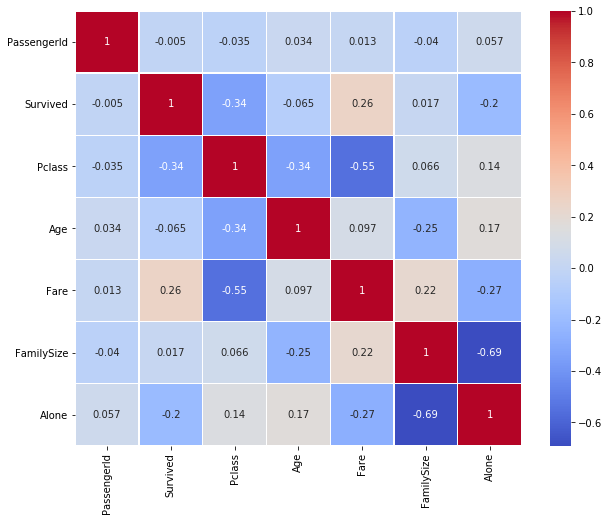

In [81]:
#Check Correlation
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [82]:

feature_col = ['Pclass','Age','Fare','FamilySize','Alone']
X = dataset[feature_col]
Y = dataset['Survived']

In [83]:
X

,Pclass,Age,Fare,FamilySize,Alone
0,3,22.0,7.2500,1,0
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,0,1
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,0,1
888,3,28.0,23.4500,3,0
889,1,26.0,30.0000,0,1


In [84]:
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
from matplotlib import style

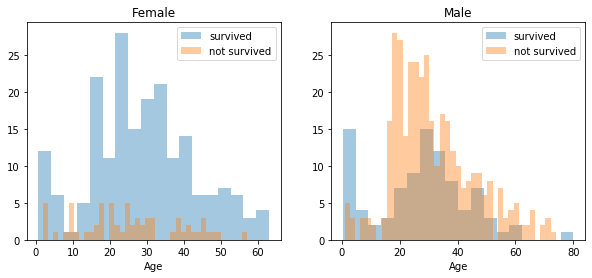

In [85]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

C:\Users\Lelia Sari\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


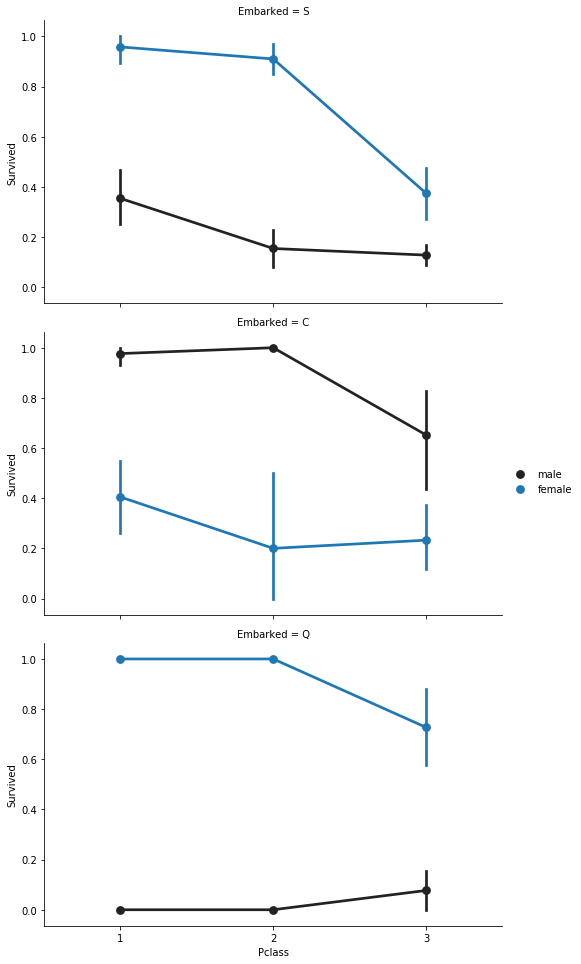

In [86]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

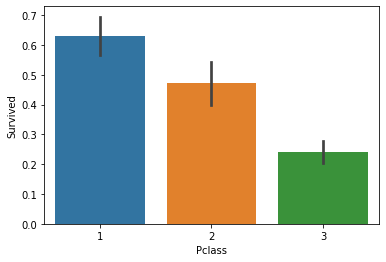

In [87]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

C:\Users\Lelia Sari\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


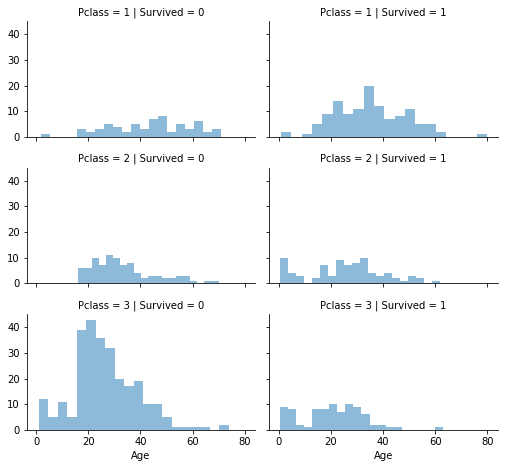

In [89]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [90]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
train_df["Age"].isnull().sum()

177

In [92]:
#The feature Age has 177 missing values so we need to fill the with values


In [93]:
data = [train_df]

In [94]:
for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [95]:
data[0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [96]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.93      0.96        27

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [97]:
data = [train_df]

In [98]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [99]:
train_df['Age'].value_counts()

4    171
6    164
5    156
3    134
2    110
1     88
0     68
Name: Age, dtype: int64

In [100]:
#Mengkategorikan fitur 'Sex' menjadi numerik

In [34]:
genders = {"male": 0, "female": 1}
data = [train_df]

In [35]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [36]:
train_df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [88]:
xtrain_ds, xtest_ds, ytrain_ds, ytest_ds = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [101]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain_ds, ytrain_ds)
pred_rf = rf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       110
           1       0.63      0.64      0.63        69

    accuracy                           0.72       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.72      0.72      0.72       179



In [102]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(xtrain_ds, ytrain_ds)
pred_dectree = decision_tree.predict(xtest_ds) 
print(classification_report(ytest_ds, pred_dectree))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       110
           1       0.55      0.52      0.53        69

    accuracy                           0.65       179
   macro avg       0.63      0.62      0.63       179
weighted avg       0.65      0.65      0.65       179



In [103]:
svc_clf = SVC(kernel='rbf',C=1,gamma=0.1) 
svc_clf.fit(xtrain_ds, ytrain_ds)
pred_svc = svc_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       110
           1       0.73      0.39      0.51        69

    accuracy                           0.71       179
   macro avg       0.72      0.65      0.65       179
weighted avg       0.71      0.71      0.68       179



In [104]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(xtrain_ds, ytrain_ds)
pred_linsvc = linsvc_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_linsvc))

              precision    recall  f1-score   support

           0       1.00      0.07      0.14       110
           1       0.40      1.00      0.57        69

    accuracy                           0.43       179
   macro avg       0.70      0.54      0.36       179
weighted avg       0.77      0.43      0.30       179



C:\Users\Lelia Sari\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [105]:
logreg_clf = LogisticRegression()
logreg_clf.fit(xtrain_ds, ytrain_ds)
pred_logreg = logreg_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_logreg))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       110
           1       0.75      0.55      0.63        69

    accuracy                           0.75       179
   macro avg       0.75      0.72      0.72       179
weighted avg       0.75      0.75      0.75       179



In [106]:
gnb_clf = GaussianNB()
gnb_clf.fit(xtrain_ds, ytrain_ds)
pred_gnb = gnb_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_gnb))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       110
           1       0.81      0.42      0.55        69

    accuracy                           0.74       179
   macro avg       0.76      0.68      0.68       179
weighted avg       0.75      0.74      0.71       179



In [107]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(xtrain_ds, ytrain_ds)
pred_knn = knn_clf.predict(xtest_ds)
print(classification_report(ytest_ds, pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       110
           1       0.65      0.58      0.61        69

    accuracy                           0.72       179
   macro avg       0.70      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



In [ ]:
#Gaussian Naive Bayes Model: Has the highest accuracy from macro average and weighted average